In [23]:
# Make sure you are using the cmip6-2019.10 kernel

# Add ldcpy root to system path (MODIFY FOR YOUR LDCPY CODE LOCATION)
import sys

sys.path.insert(0, '/glade/u/home/apinard/newldcpy/ldcpy')
import ldcpy

# Display output of plots directly in Notebook
%matplotlib inline
# Automatically reload module if it is editted
%reload_ext autoreload
%autoreload 2

# silence warnings
import warnings

warnings.filterwarnings("ignore")

In [24]:
start the dask scheduler

Note: This notebook should run on Cheyenne for now, running on casper will work for
the most part but trying to plot the LHFLX variable will result in a timeout,
presumably due to the large file sizes for the variable.

for Cheyenne
from dask_jobqueue import PBSCluster

cluster = PBSCluster(
    queue="regular",
    walltime="02:00:00",
    project="NIOW0001",
    memory="109GB",
    resource_spec="select=1:ncpus=9:mem=109GB",
    cores=36,
    processes=9,
)


# scale as needed
cluster.adapt(minimum_jobs=1, maximum_jobs=30)
cluster

In [25]:
from dask.distributed import Client

# Connect client to the remote dask workers
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: dask_jobqueue.PBSCluster
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/apinard/proxy/{port}/status,
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/apinard/proxy/{port}/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://10.148.10.19:46137,Workers: 0
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/apinard/proxy/{port}/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [ ]:
# Rerun on zfp
import time

cols_monthly = {}
cols_daily = {}
sets = {}
levels = {}
data_path = "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/"
monthly_variables = ["CCN3", "CLOUD", "FLNS", "FLNT", "FSNS", "FSNT", "LHFLX",
            "PRECC", "PRECL", "PS", "QFLX", "SHFLX", "TMQ", "TS", "U"]
daily_variables = ["FLUT", "LHFLX", "PRECT", "TAUX", "TS", "Z500"]

for variable in daily_variables:
    print(variable)
    levels[variable] = [f"zfp_p_8_{variable}",
                        f"zfp_p_10_{variable}",
                        f"zfp_p_12_{variable}", f"zfp_p_14_{variable}",
                        f"zfp_p_16_{variable}", f"zfp_p_18_{variable}", f"zfp_p_20_{variable}",
                        f"zfp_p_22_{variable}", f"zfp_p_24_{variable}"]
    sets[variable] = [f"{orig_path}/orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_all/zfp_p_8/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_all/zfp_p_10/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_all/zfp_p_12/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_all/zfp_p_14/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_all/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_all/zfp_p_18/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_all/zfp_p_20/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_all/zfp_p_22/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_all/zfp_p_24/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc"]
    cols_daily[variable] = ldcpy.open_datasets("cam-fv", [f"{variable}"], sets[variable], [f"orig_{variable}"] + levels[variable], chunks={"time":700})

for variable in monthly_variables:
    print(variable)
    levels[variable] = [f"zfp_p_8_{variable}",
                        f"zfp_p_10_{variable}",
                        f"zfp_p_12_{variable}", f"zfp_p_14_{variable}",
                        f"zfp_p_16_{variable}", f"zfp_p_18_{variable}", f"zfp_p_20_{variable}",
                        f"zfp_p_22_{variable}", f"zfp_p_24_{variable}"]
    sets[variable] = [f"{orig_path}/orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_all/zfp_p_8/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_all/zfp_p_10/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_all/zfp_p_12/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_all/zfp_p_14/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_all/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_all/zfp_p_18/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_all/zfp_p_20/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_all/zfp_p_22/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_all/zfp_p_24/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc"]
    cols_monthly[variable] = ldcpy.open_datasets("cam-fv", [f"{variable}"], sets[variable], [f"orig_{variable}"] + levels[variable], chunks={"time":700})



In [8]:
import numpy as np
dailys = ["TS", "PRECT", "TAUX", "FLUT", "Z500", "LHFLX"]
monthlys = [
    "TS",
    "U",
    "FLNS",
    "CCN3",
    "CLOUD",
    "TMQ",
    "PS",
    "FSNS",
    "SHFLX",
    "LHFLX",
    "FLNT",
    "QFLX",
    "PRECC",
    "PRECL",
    "FSNT", ]
f = np.array(["daily", "monthly"])
freqs = np.repeat(f, [len(dailys), len(monthlys)], axis=0)
i = 0

for variable in (dailys + monthlys):
    variable = variable
    frequency = freqs[i]
    i = i+1

    if frequency == "daily":
        cols = cols_daily
    elif frequency == "monthly":
        cols = cols_monthly

    ds = cols[variable].isel(time=0)
    print("Comparison for", frequency, "variable", variable)
    ldcpy.compare_stats(
        ds,
        variable,
        ["orig", "conservative", "middle_ground", "aggressive", "extra_aggressive"],
        significant_digits=6,
    )
    print("\n\n\n\n")

Comparison for daily variable TS


,orig,conservative,middle_ground,aggressive,extra_aggressive
mean,284.644,284.644,284.644,284.644,284.64
variance,510.349,510.349,510.348,510.344,510.803
standard deviation,22.5909,22.5909,22.5909,22.5908,22.6009
min value,218.119,218.119,218.118,218.188,217.25
max value,321.471,321.472,321.469,321.469,321
probability positive,1,1,1,1,1
number of zeros,0,0,0,0,0


,conservative,middle_ground,aggressive,extra_aggressive
max abs diff,0.000854492,0.0137939,0.222534,3.53293
min abs diff,0,0,0,0
mean abs diff,0.000219553,0.0035049,0.0498157,0.610853
mean squared diff,1.09653e-12,1.61199e-10,6.79574e-08,1.77243e-05
root mean squared diff,0.000273523,0.00436515,0.0624376,0.764835
normalized root mean squared diff,2.48153e-06,3.96542e-05,0.000573072,0.00703364
normalized max pointwise error,8.26782e-06,0.000133466,0.00208172,0.0326874
pearson correlation coefficient,1,1,0.999997,0.999483
ks p-value,1,1,0.999252,1.79585e-42
spatial relative error(% > 0.0001),0,0,63.01,97.1445







Comparison for daily variable PRECT


,orig,conservative,middle_ground,aggressive,extra_aggressive
mean,2.73814e-08,2.73813e-08,2.73839e-08,2.73802e-08,2.76446e-08
variance,5.9544e-15,5.95375e-15,5.96102e-15,5.92484e-15,6.42944e-15
standard deviation,7.71648e-08,7.71605e-08,7.72076e-08,7.6973e-08,8.01838e-08
min value,-1.16413e-20,-2.32831e-10,-9.31323e-09,-4.47035e-08,-9.53674e-07
max value,4.33175e-06,4.33112e-06,4.35114e-06,4.32134e-06,4.76837e-06
probability positive,0.9611,0.886646,0.864764,0.849465,0.811433
number of zeros,2097,2913,3353,3700,2278


,conservative,middle_ground,aggressive,extra_aggressive
max abs diff,2.19416e-09,2.06232e-08,1.37862e-07,1.47072e-06
min abs diff,0,0,0,0
mean abs diff,7.87555e-12,1.24798e-10,5.05441e-10,7.72766e-09
mean squared diff,1.75484e-26,6.25703e-24,1.42836e-24,6.92334e-20
root mean squared diff,2.92536e-11,4.53586e-10,1.85589e-09,2.8092e-08
normalized root mean squared diff,5.70633e-06,8.86594e-05,0.00036138,0.00546958
normalized max pointwise error,0.000506529,0.00411312,0.0139455,0.339522
pearson correlation coefficient,1,0.999988,0.999797,0.955377
ks p-value,8.48059e-134,8.72323e-224,1.4218e-300,0
spatial relative error(% > 0.0001),78.4017,95.1317,95.9328,96.1806







Comparison for daily variable TAUX


,orig,conservative,middle_ground,aggressive,extra_aggressive
mean,-0.0039046,-0.00390457,-0.00390531,-0.00391163,-0.00410043
variance,0.0150918,0.0150916,0.015091,0.0151112,0.0155287
standard deviation,0.122849,0.122848,0.122846,0.122927,0.124614
min value,-2.03861,-2.03809,-2.02344,-2.03125,-2
max value,1.01317,1.01379,1.00391,1.00781,0.875
probability positive,0.537453,0.537417,0.537272,0.536603,0.532263
number of zeros,0,2,22,74,427


,conservative,middle_ground,aggressive,extra_aggressive
max abs diff,0.00106192,0.0151691,0.051722,0.648458
min abs diff,0,0,2.32831e-10,6.63337e-08
mean abs diff,1.34171e-05,0.000215677,0.000841265,0.0104882
mean squared diff,9.3122e-16,5.09698e-13,4.94868e-11,3.83494e-08
root mean squared diff,3.07046e-05,0.000503595,0.0019109,0.0246623
normalized root mean squared diff,9.96704e-06,0.000162705,0.000616273,0.00783718
normalized max pointwise error,0.000176288,0.0038237,0.0169481,0.20561
pearson correlation coefficient,1,0.999992,0.999883,0.981419
ks p-value,1,1,1,1.60064e-15
spatial relative error(% > 0.0001),72.0269,98.1698,99.5388,99.9656







Comparison for daily variable FLUT


,orig,conservative,middle_ground,aggressive,extra_aggressive
mean,233.721,233.721,233.721,233.727,233.715
variance,2077.54,2077.54,2077.57,2077.94,2119.97
standard deviation,45.5801,45.5801,45.5803,45.5844,46.0431
min value,80.5289,80.5278,80.5547,80,64
max value,338.079,338.08,338.125,336.5,368
probability positive,1,1,1,1,1
number of zeros,0,0,0,0,0


,conservative,middle_ground,aggressive,extra_aggressive
max abs diff,0.0139771,0.221497,3.54816,52.8217
min abs diff,0,0,0,9.15527e-05
mean abs diff,0.00274354,0.0438462,0.688851,7.67195
mean squared diff,1.65448e-10,1.6727e-08,3.75937e-05,4.08575e-05
root mean squared diff,0.00356068,0.056993,0.896098,9.94527
normalized root mean squared diff,1.25062e-05,0.000199581,0.00311684,0.0343592
normalized max pointwise error,5.42692e-05,0.000828849,0.0133278,0.205092
pearson correlation coefficient,1,0.999999,0.999845,0.981394
ks p-value,1,1,0.273955,9.33393e-260
spatial relative error(% > 0.0001),0,64.5996,97.5423,99.8047







Comparison for daily variable Z500


,orig,conservative,middle_ground,aggressive,extra_aggressive
mean,5636.49,5636.49,5636.49,5636.49,5636.45
variance,95274.7,95274.7,95274.7,95276.3,95279.8
standard deviation,308.666,308.666,308.666,308.669,308.674
min value,4880.72,4880.72,4880.74,4880.25,4880
max value,5909.61,5909.61,5909.61,5909.88,5916
probability positive,1,1,1,1,1
number of zeros,0,0,0,0,0


,conservative,middle_ground,aggressive,extra_aggressive
max abs diff,0.00341797,0.0556641,0.890137,13.6582
min abs diff,0,0,0,0
mean abs diff,0.000912438,0.0147264,0.229473,2.78666
mean squared diff,4.48284e-09,8.43567e-11,3.31586e-07,0.00119351
root mean squared diff,0.00113766,0.0180967,0.283173,3.47702
normalized root mean squared diff,1.09848e-06,1.74169e-05,0.000268299,0.00337089
normalized max pointwise error,2.84743e-06,5.3152e-05,0.000865143,0.0125524
pearson correlation coefficient,1,1,1,0.999937
ks p-value,0.439829,0.439829,0.413674,1.17282e-26
spatial relative error(% > 0.0001),0,0,4.29507,88.1022







Comparison for daily variable LHFLX


,orig,conservative,middle_ground,aggressive,extra_aggressive
mean,79.52,79.5201,79.5226,79.525,79.197
variance,6801.29,6801.31,6801.89,6806.92,6951.11
standard deviation,82.47,82.4701,82.4736,82.504,83.3733
min value,-48.8885,-48.8789,-49.0625,-49.25,-128
max value,772.584,772.5,775,764,896
probability positive,0.744321,0.744285,0.74405,0.742567,0.729926
number of zeros,148,70,83,147,414


,conservative,middle_ground,aggressive,extra_aggressive
max abs diff,0.346069,6.50543,26.8036,390.085
min abs diff,0,0,0,0
mean abs diff,0.0160443,0.254893,0.980106,11.3923
mean squared diff,5.32204e-09,6.4603e-06,2.44658e-05,0.104354
root mean squared diff,0.0287542,0.45857,1.75742,20.8705
normalized root mean squared diff,2.98741e-05,0.000476192,0.00182887,0.0217786
normalized max pointwise error,0.000353462,0.00791924,0.0277605,0.474861
pearson correlation coefficient,1,0.999989,0.999834,0.976789
ks p-value,1,1,0.99418,3.71165e-83
spatial relative error(% > 0.0001),71.0901,97.913,99.4068,99.9023







Comparison for monthly variable TS


,orig,conservative,middle_ground,aggressive,extra_aggressive
mean,285.536,285.536,285.536,285.537,285.532
variance,512.862,512.862,512.863,512.871,512.925
standard deviation,22.6465,22.6465,22.6465,22.6467,22.6479
min value,224.492,224.492,224.496,224.469,224
max value,307.258,307.257,307.256,307.25,307
probability positive,1,1,1,1,1
number of zeros,0,0,0,0,0


,conservative,middle_ground,aggressive,extra_aggressive
max abs diff,0.000854492,0.0138245,0.218811,3.31232
min abs diff,0,0,0,0
mean abs diff,0.000220706,0.0034914,0.0493018,0.59127
mean squared diff,1.52203e-11,3.69245e-10,2.41185e-07,2.33995e-05
root mean squared diff,0.000274489,0.00434607,0.0618858,0.736074
normalized root mean squared diff,3.10748e-06,4.92789e-05,0.000705069,0.00838853
normalized max pointwise error,1.03243e-05,0.000167032,0.00253259,0.0400206
pearson correlation coefficient,1,1,0.999997,0.99953
ks p-value,1,1,0.999352,3.52521e-47
spatial relative error(% > 0.0001),0,0,62.0714,96.7357







Comparison for monthly variable U


,orig,conservative,middle_ground,aggressive,extra_aggressive
mean,4.54457,4.54457,4.54457,4.54463,4.54459
variance,251.347,251.347,251.348,251.347,251.191
standard deviation,15.8539,15.8539,15.854,15.8539,15.849
min value,-91.6622,-91.6406,-91.8125,-91.75,-88
max value,96.7496,96.7656,96.75,96.5,96
probability positive,0.630468,0.630468,0.630465,0.630452,0.630105
number of zeros,0,1,12,73,1180


,conservative,middle_ground,aggressive,extra_aggressive
max abs diff,0.0531769,0.199936,0.802689,8.44503
min abs diff,0,0,0,0
mean abs diff,0.00202414,0.00765845,0.0277817,0.339742
mean squared diff,9.49701e-12,4.18303e-12,2.75221e-09,3.336e-10
root mean squared diff,0.00343992,0.0128604,0.0460793,0.537717
normalized root mean squared diff,1.77386e-05,6.5534e-05,0.000236171,0.00276542
normalized max pointwise error,0.00027422,0.00105594,0.0037125,0.0331235
pearson correlation coefficient,1,1,0.999996,0.99946
ks p-value,1,1,0.909863,8.63733e-197
spatial relative error(% > 0.0001),64.3238,90.2855,97.3954,99.8032







Comparison for monthly variable FLNS


,orig,conservative,middle_ground,aggressive,extra_aggressive
mean,53.0496,53.0496,53.0494,53.049,52.4822
variance,401.488,401.488,401.496,401.573,400.182
standard deviation,20.0372,20.0372,20.0374,20.0393,20.0045
min value,5.67107,5.66992,5.69531,5.625,-32
max value,169.778,169.766,169.688,169,224
probability positive,1,1,1,1,0.999819
number of zeros,0,0,0,0,4


,conservative,middle_ground,aggressive,extra_aggressive
max abs diff,0.0231171,0.393347,6.02707,82.8462
min abs diff,0,1.90735e-06,3.05176e-05,0.000106812
mean abs diff,0.00230648,0.0368043,0.56358,5.20922
mean squared diff,9.95261e-13,2.17763e-08,3.172e-07,0.321971
root mean squared diff,0.00309077,0.0492402,0.75694,6.97333
normalized root mean squared diff,1.8819e-05,0.00029895,0.00448696,0.0435835
normalized max pointwise error,0.000132358,0.00210044,0.0335464,0.487886
pearson correlation coefficient,1,0.999997,0.999325,0.93742
ks p-value,1,1,0.00237306,0
spatial relative error(% > 0.0001),7.61176,91.1531,99.396,99.9566







Comparison for monthly variable CCN3


,orig,conservative,middle_ground,aggressive,extra_aggressive
mean,22.9956,22.9956,22.9956,22.9956,22.996
variance,2603.1,2603.1,2603.1,2603.1,2603.12
standard deviation,51.0206,51.0206,51.0206,51.0206,51.0208
min value,4.12118e-05,4.12119e-05,4.1211e-05,4.12464e-05,4.05312e-05
max value,2230.85,2230.86,2230.62,2234,2176
probability positive,1,1,1,1,1
number of zeros,0,0,0,0,0


,conservative,middle_ground,aggressive,extra_aggressive
max abs diff,0.0109863,0.227539,3.14746,54.8525
min abs diff,0,0,0,0
mean abs diff,6.61056e-05,0.00105567,0.0168694,0.252578
mean squared diff,4.09558e-13,1.44996e-11,4.28463e-11,1.01676e-07
root mean squared diff,0.000237889,0.00378445,0.0607381,0.94022
normalized root mean squared diff,8.80407e-08,1.40083e-06,2.24771e-05,0.000347525
normalized max pointwise error,4.76056e-06,0.000101996,0.0013392,0.0245882
pearson correlation coefficient,1,1,1,0.999885
ks p-value,1,1,1,1.88475e-10
spatial relative error(% > 0.0001),0.000120563,6.42964,90.0295,99.2647







Comparison for monthly variable CLOUD


,orig,conservative,middle_ground,aggressive,extra_aggressive
mean,0.116248,0.116248,0.116248,0.116249,0.11552
variance,0.0249524,0.0249524,0.024953,0.0249601,0.02491
standard deviation,0.157963,0.157963,0.157965,0.157988,0.157829
min value,0,-0.000366211,-0.00390625,-0.0117188,-0.125
max value,0.984164,0.984131,0.985352,0.988281,1.125
probability positive,0.675796,0.678757,0.677206,0.675876,0.668831
number of zeros,537816,526819,527841,528755,526286


,conservative,middle_ground,aggressive,extra_aggressive
max abs diff,0.00043118,0.00701571,0.0285475,0.398906
min abs diff,0,0,0,0
mean abs diff,2.15609e-05,0.000345228,0.0013486,0.0136169
mean squared diff,1.43328e-15,6.00713e-14,2.46151e-14,5.30905e-07
root mean squared diff,4.35959e-05,0.000698651,0.00271722,0.0267086
normalized root mean squared diff,4.60445e-05,0.000735046,0.00282868,0.027241
normalized max pointwise error,0.000438118,0.00702866,0.0290069,0.380478
pearson correlation coefficient,1,0.99999,0.999845,0.985603
ks p-value,4.06824e-10,1.09263e-15,2.7008e-21,0
spatial relative error(% > 0.0001),45.8606,66.1624,67.2393,67.6392







Comparison for monthly variable TMQ


,orig,conservative,middle_ground,aggressive,extra_aggressive
mean,23.4327,23.4327,23.4327,23.433,23.4314
variance,241.722,241.722,241.723,241.736,242.071
standard deviation,15.5474,15.5474,15.5474,15.5479,15.5586
min value,0.437417,0.437416,0.4375,0.435547,0.4375
max value,59.1004,59.1001,59.0781,59.125,60
probability positive,1,1,1,1,1
number of zeros,0,0,0,0,0


,conservative,middle_ground,aggressive,extra_aggressive
max abs diff,0.00170517,0.107555,0.436195,6.28771
min abs diff,0,0,5.96046e-08,4.05312e-06
mean abs diff,0.000248061,0.0156115,0.0579629,0.655571
mean squared diff,2.84499e-14,4.04053e-09,7.36222e-08,1.85384e-06
root mean squared diff,0.000367451,0.0231008,0.086221,0.95051
normalized root mean squared diff,5.19605e-06,0.000326499,0.00121886,0.0134341
normalized max pointwise error,2.80268e-05,0.00183345,0.00719063,0.105425
pearson correlation coefficient,1,0.999999,0.999989,0.998716
ks p-value,0.439829,0.41797,0.32968,2.70384e-11
spatial relative error(% > 0.0001),0.00180845,90.4586,97.3217,99.7541







Comparison for monthly variable PS


,orig,conservative,middle_ground,aggressive,extra_aggressive
mean,98518.4,98518.4,98518.4,98518.4,98518.9
variance,9.21206e+07,9.21206e+07,9.21207e+07,9.212e+07,9.21444e+07
standard deviation,9597.95,9597.95,9597.95,9597.92,9599.19
min value,52399.6,52399.6,52399.6,52402,52368
max value,103900,103900,103900,103900,103936
probability positive,1,1,1,1,1
number of zeros,0,0,0,0,0


,conservative,middle_ground,aggressive,extra_aggressive
max abs diff,0.0546875,0.882812,14.2266,227.164
min abs diff,0,0,0,0
mean abs diff,0.0145903,0.23326,3.36526,45.6694
mean squared diff,9.47885e-07,1.79722e-08,0.00167488,0.236824
root mean squared diff,0.0181765,0.28809,4.1884,57.7418
normalized root mean squared diff,3.50101e-07,5.51912e-06,8.08454e-05,0.00111907
normalized max pointwise error,9.10182e-07,1.66867e-05,0.000268352,0.00441089
pearson correlation coefficient,1,1,1,0.999982
ks p-value,0.439829,0.435407,0.409404,1.52975e-09
spatial relative error(% > 0.0001),0,0,2.27865,87.1076







Comparison for monthly variable FSNS


,orig,conservative,middle_ground,aggressive,extra_aggressive
mean,166.454,166.454,166.455,166.462,163.16
variance,9516.39,9516.38,9516.59,9521.44,9220.38
standard deviation,97.552,97.5519,97.553,97.5779,96.0228
min value,0,0,0,0,-64
max value,341.737,341.727,341.75,350,448
probability positive,0.901042,0.901042,0.901042,0.901042,0.900861
number of zeros,5472,5472,5472,5472,5474


,conservative,middle_ground,aggressive,extra_aggressive
max abs diff,0.0517273,0.844757,13.1761,152.932
min abs diff,0,0,0,0
mean abs diff,0.00718616,0.115432,1.67693,15.2976
mean squared diff,8.5733e-09,2.17412e-06,7.6512e-05,10.8479
root mean squared diff,0.0103895,0.166896,2.39163,21.0686
normalized root mean squared diff,2.66149e-05,0.000427307,0.00615877,0.054276
normalized max pointwise error,0.000149848,0.00247195,0.0364027,0.387998
pearson correlation coefficient,1,0.999999,0.999767,0.982248
ks p-value,1,1,0.0519144,0
spatial relative error(% > 0.0001),6.68764,81.6171,89.5761,90.0698







Comparison for monthly variable SHFLX


,orig,conservative,middle_ground,aggressive,extra_aggressive
mean,16.5319,16.5319,16.5322,16.5335,16.3953
variance,808.148,808.151,808.197,808.802,822.377
standard deviation,28.4279,28.428,28.4288,28.4394,28.6771
min value,-47.1006,-47.1025,-47.1094,-47.5,-96
max value,418.593,418.586,418.875,426,448
probability positive,0.672888,0.672888,0.672888,0.672779,0.667499
number of zeros,0,1,1,21,215


,conservative,middle_ground,aggressive,extra_aggressive
max abs diff,0.0389709,0.696228,12.7831,171.525
min abs diff,0,0,9.53674e-07,4.29153e-06
mean abs diff,0.000959272,0.0153461,0.234881,2.87351
mean squared diff,2.07759e-10,8.95798e-08,2.49003e-06,0.0186741
root mean squared diff,0.00197544,0.0315208,0.491432,6.42267
normalized root mean squared diff,4.15111e-06,6.599e-05,0.00102557,0.0133542
normalized max pointwise error,7.77858e-05,0.00126259,0.0274495,0.368321
pearson correlation coefficient,1,0.999999,0.999859,0.976325
ks p-value,1,1,0.94631,2.21131e-158
spatial relative error(% > 0.0001),13.7551,91.8945,99.4665,99.953







Comparison for monthly variable LHFLX


,orig,conservative,middle_ground,aggressive,extra_aggressive
mean,88.1332,88.1332,88.1325,88.1274,87.502
variance,4447.59,4447.58,4447.52,4449.53,4477.9
standard deviation,66.6902,66.6902,66.6897,66.7048,66.9171
min value,-5.77087,-5.77051,-5.7793,-5.8125,-64
max value,360.219,360.125,360.625,360,448
probability positive,0.828975,0.828975,0.828975,0.828541,0.822067
number of zeros,0,0,1,29,185


,conservative,middle_ground,aggressive,extra_aggressive
max abs diff,0.1922,0.849365,14.3183,197.342
min abs diff,0,0,0,1.26287e-06
mean abs diff,0.0157787,0.0632902,0.898434,9.48555
mean squared diff,2.30818e-09,4.81727e-07,3.44176e-05,0.398377
root mean squared diff,0.0242595,0.0974713,1.39518,14.4553
normalized root mean squared diff,5.61975e-05,0.000225492,0.0032323,0.033581
normalized max pointwise error,0.00052515,0.00201271,0.0391221,0.539201
pearson correlation coefficient,1,0.999999,0.999843,0.983104
ks p-value,1,1,0.891588,3.08563e-197
spatial relative error(% > 0.0001),67.7572,91.5925,99.4285,99.9349







Comparison for monthly variable FLNT


,orig,conservative,middle_ground,aggressive,extra_aggressive
mean,232.481,232.481,232.482,232.477,232.354
variance,1522.72,1522.72,1522.75,1522.87,1580.77
standard deviation,39.0221,39.0221,39.0224,39.024,39.7589
min value,140.592,140.593,140.625,140.5,136
max value,303.583,303.576,303.531,303.5,304
probability positive,1,1,1,1,1
number of zeros,0,0,0,0,0


,conservative,middle_ground,aggressive,extra_aggressive
max abs diff,0.0136719,0.22049,3.23825,40.3191
min abs diff,0,0,0,0.000473022
mean abs diff,0.00243929,0.0389833,0.544934,5.51045
mean squared diff,4.26954e-12,5.35263e-08,2.30934e-05,0.0163699
root mean squared diff,0.00317983,0.0508361,0.709792,6.85353
normalized root mean squared diff,1.78861e-05,0.000285035,0.00394854,0.0387575
normalized max pointwise error,8.1447e-05,0.00135277,0.0195932,0.24737
pearson correlation coefficient,1,0.999999,0.999864,0.987341
ks p-value,1,1,0.000591258,5.01629e-248
spatial relative error(% > 0.0001),0,62.3861,97.215,99.7667







Comparison for monthly variable QFLX


,orig,conservative,middle_ground,aggressive,extra_aggressive
mean,3.52272e-05,3.52272e-05,3.52272e-05,3.52257e-05,3.50217e-05
variance,7.11644e-10,7.11642e-10,7.11704e-10,7.11841e-10,7.20547e-10
standard deviation,2.66767e-05,2.66766e-05,2.66778e-05,2.66803e-05,2.6843e-05
min value,-2.25619e-06,-2.25613e-06,-2.25753e-06,-2.29478e-06,-3.05176e-05
max value,0.00014403,0.000143945,0.000144005,0.000146866,0.000213623
probability positive,0.831525,0.831525,0.831525,0.830838,0.824725
number of zeros,0,0,7,40,164


,conservative,middle_ground,aggressive,extra_aggressive
max abs diff,8.48813e-08,1.42453e-06,4.83797e-06,7.0835e-05
min abs diff,0,7.99361e-15,5.80869e-13,1.17595e-12
mean abs diff,6.37032e-09,9.80363e-08,3.61058e-07,3.83023e-06
mean squared diff,6.40363e-22,7.63035e-22,2.19762e-18,4.22269e-14
root mean squared diff,9.83648e-09,1.51266e-07,5.57101e-07,5.8064e-06
normalized root mean squared diff,5.69998e-05,0.000877493,0.00323121,0.0337818
normalized max pointwise error,0.000580241,0.00777864,0.032131,0.478233
pearson correlation coefficient,1,0.999988,0.999843,0.982983
ks p-value,1,1,0.895154,3.31386e-224
spatial relative error(% > 0.0001),68.0501,97.8064,99.3869,99.9494







Comparison for monthly variable PRECC


,orig,conservative,middle_ground,aggressive,extra_aggressive
mean,2.26522e-08,2.26523e-08,2.26522e-08,2.26549e-08,2.26029e-08
variance,8.39462e-16,8.39469e-16,8.39525e-16,8.39837e-16,8.47622e-16
standard deviation,2.89735e-08,2.89736e-08,2.89746e-08,2.89799e-08,2.9114e-08
min value,0,-1.45519e-11,-1.39698e-09,-1.86265e-09,-2.98023e-08
max value,2.32506e-07,2.32452e-07,2.33296e-07,2.32831e-07,2.68221e-07
probability positive,0.696036,0.702637,0.70166,0.700883,0.690104
number of zeros,16808,15845,15878,15876,15750


,conservative,middle_ground,aggressive,extra_aggressive
max abs diff,1.04635e-10,1.45329e-09,6.01061e-09,9.78834e-08
min abs diff,0,0,0,0
mean abs diff,4.30274e-12,6.96946e-11,2.74393e-10,3.01804e-09
mean squared diff,2.38881e-27,2.82417e-27,7.18095e-24,2.435e-21
root mean squared diff,9.37098e-12,1.50194e-10,5.92371e-10,6.56529e-09
normalized root mean squared diff,3.27728e-05,0.000525525,0.00207253,0.0229864
normalized max pointwise error,0.000450029,0.00625055,0.0244423,0.420993
pearson correlation coefficient,1,0.999991,0.999862,0.983081
ks p-value,0.00308481,0.00194261,0.0006834,9.0126e-20
spatial relative error(% > 0.0001),48.5695,68.2527,69.2075,69.5674







Comparison for monthly variable PRECL


,orig,conservative,middle_ground,aggressive,extra_aggressive
mean,1.23919e-08,1.23919e-08,1.23918e-08,1.2392e-08,1.23866e-08
variance,2.49936e-16,2.49932e-16,2.49932e-16,2.4995e-16,2.63348e-16
standard deviation,1.58094e-08,1.58092e-08,1.58092e-08,1.58098e-08,1.6228e-08
min value,9.52057e-17,-1.42109e-14,-2.84217e-13,-3.72529e-09,-5.96046e-08
max value,2.76873e-07,2.76748e-07,2.77068e-07,2.71946e-07,2.98023e-07
probability positive,1,0.999946,0.999765,0.998897,0.985442
number of zeros,0,1,3,21,78


,conservative,middle_ground,aggressive,extra_aggressive
max abs diff,1.24373e-10,5.38833e-10,6.11758e-09,1.19444e-07
min abs diff,0,4.03863e-19,4.87383e-18,2.57413e-17
mean abs diff,2.53026e-12,1.0096e-11,1.58648e-10,1.9038e-09
mean squared diff,8.92226e-29,5.02629e-27,1.14203e-26,2.77265e-23
root mean squared diff,5.16284e-12,2.04595e-11,3.22151e-10,4.18865e-09
normalized root mean squared diff,1.80737e-05,7.14121e-05,0.0011203,0.0142034
normalized max pointwise error,0.000449208,0.00194614,0.0220953,0.348409
pearson correlation coefficient,1,0.999999,0.999808,0.970202
ks p-value,0.43101,0.43101,0.142162,9.68711e-72
spatial relative error(% > 0.0001),69.2039,92.1134,99.5407,99.9693







Comparison for monthly variable FSNT


,orig,conservative,middle_ground,aggressive,extra_aggressive
mean,241.541,241.541,241.543,241.543,241.45
variance,17747.5,17747.5,17747.9,17747.9,17779.1
standard deviation,133.22,133.22,133.221,133.221,133.338
min value,0,0,0,0,0
max value,432.158,432.156,431.75,431.75,432
probability positive,0.901042,0.901042,0.901042,0.901042,0.901042
number of zeros,5472,5472,5472,5472,5472


,conservative,middle_ground,aggressive,extra_aggressive
max abs diff,0.0548706,0.895325,0.895325,50.0448
min abs diff,0,0,0,0
mean abs diff,0.0106988,0.170099,0.170099,6.83121
mean squared diff,5.11019e-10,3.31907e-06,3.31907e-06,0.00828712
root mean squared diff,0.0146781,0.234038,0.234038,9.22802
normalized root mean squared diff,3.05134e-05,0.000485855,0.000485855,0.0191532
normalized max pointwise error,0.000126051,0.00207175,0.00207175,0.112445
pearson correlation coefficient,1,0.999999,0.999999,0.998072
ks p-value,1,1,1,1.71578e-92
spatial relative error(% > 0.0001),7.12529,82.1633,82.1633,89.9269


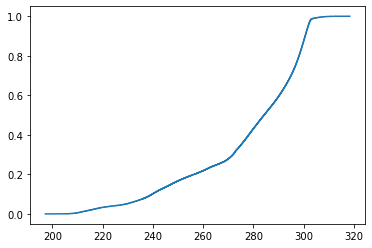

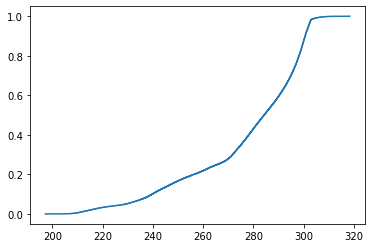

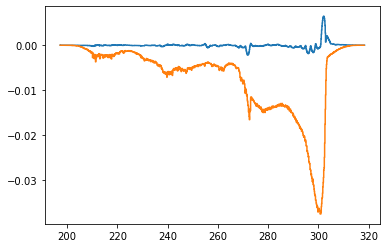

In [56]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
variable="TS"
my_data = cols_monthly[variable].sel(collection="orig")
sample1 = ldcpy.Datasetcalcs(my_data.to_array(), []).get_calc("ds").values.flatten()
ecdf = sm.distributions.ECDF(sample1)

x = np.linspace(min(sample1), max(sample1), num=1000)
y1 = ecdf(x)
plt.step(x, y1)
plt.show()


my_data_a = cols_monthly[variable].sel(collection="extra_aggressive")
sample2 = ldcpy.Datasetcalcs(my_data_a.to_array(), []).get_calc("ds").values.flatten()
sample2 = sample2 + np.random.uniform(-1, 1, size=len(sample2))
ecdf = sm.distributions.ECDF(sample2)

x = np.linspace(min(sample1), max(sample1), num=1000)
y2 = ecdf(x)
plt.step(x, y2)
plt.show()

y3 = y1-y2
plt.step(x, y3)
plt.step(x[:-1], (y1[:-1] - y1[1:]) * 7)
plt.show()

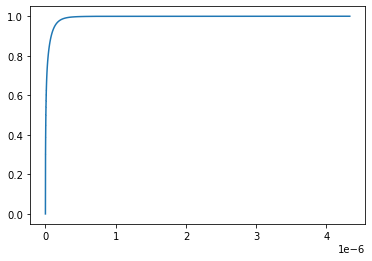

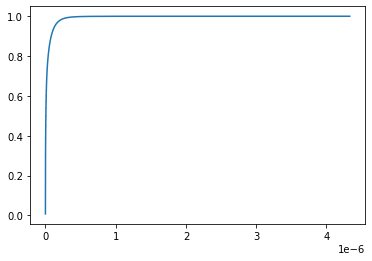

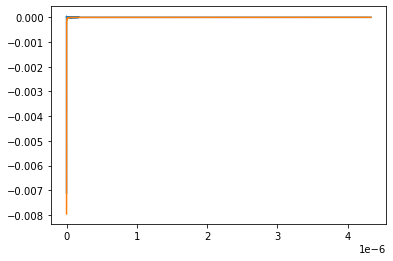

In [48]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
variable="PRECT"
my_data = cols_daily[variable].sel(collection="orig")
sample1 = ldcpy.Datasetcalcs(my_data.to_array(), []).get_calc("ds").values.flatten()
ecdf = sm.distributions.ECDF(sample1)

x = np.linspace(min(sample1), max(sample1), num=100000)
y1 = ecdf(x)
plt.step(x, y1)
plt.show()


my_data_a = cols_daily[variable].sel(collection="conservative")
sample2 = ldcpy.Datasetcalcs(my_data_a.to_array(), []).get_calc("ds").values.flatten()
ecdf = sm.distributions.ECDF(sample2)

x = np.linspace(min(sample1), max(sample1), num=100000)
y2 = ecdf(x)
plt.step(x, y2)
plt.show()

y3 = y1-y2
plt.step(x, y3)
plt.step(x[:-1], (y1[:-1] - y1[1:]) * 0.07)
plt.show()

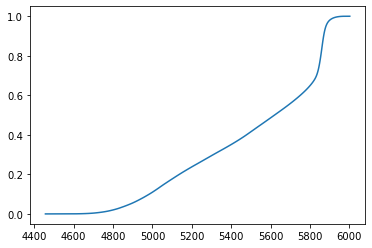

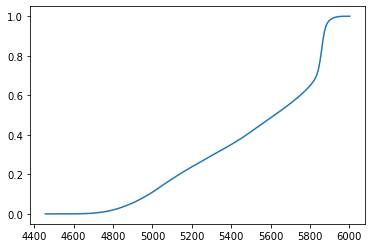

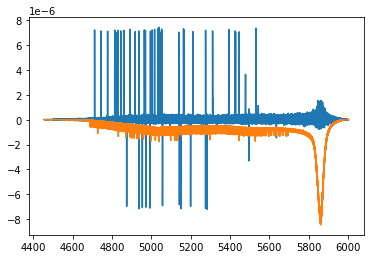

In [7]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
variable="Z500"
my_data = cols_daily[variable].sel(collection="orig")
sample1 = ldcpy.Datasetcalcs(my_data.to_array(), "cam-fv", []).get_calc("ds").values.flatten()
ecdf = sm.distributions.ECDF(sample1)

x = np.linspace(min(sample1), max(sample1), num=100000)
y1 = ecdf(x)
plt.step(x, y1)
plt.show()


my_data_a = cols_daily[variable].sel(collection="conservative")
sample2 = ldcpy.Datasetcalcs(my_data_a.to_array(), "cam-fv", []).get_calc("ds").values.flatten()
ecdf = sm.distributions.ECDF(sample2)

x = np.linspace(min(sample1), max(sample1), num=100000)
y2 = ecdf(x)
plt.step(x, y2)
plt.show()

y3 = y1-y2
plt.step(x, y3)
plt.step(x[:-1], (y1[:-1] - y1[1:]) * 0.07)
plt.show()